<center><h1>Saloni_Fnu_HW7</h1></center>

Name: Fnu Saloni
<br>
Github Username: fnusaloni
<br>
USC ID: 3175644840

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import hamming
from itertools import combinations
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, hamming_loss
from scipy.stats import mode
import warnings

warnings.filterwarnings("ignore")  

### (a) Download the Anuran Calls (MFCCs) Data Set

In [71]:
# loading the dataset
location = "../data/Frogs_MFCCs.csv"
ds = pd.read_csv(location)

# selecting feature and label columns
featCol = ds.columns[:22]
labelCol = ['Family', 'Genus', 'Species']

# separating features and labels
XCol = ds[featCol]
YCol = ds[labelCol]

# splitting data into training and testing sets
trainInp, testInp, trainOut, testOut = train_test_split(
    XCol, YCol, train_size=0.7, random_state=42, shuffle=True
)

# printing the shapes of the resulting sets
print("Training set shape:", trainInp.shape)
print("testing set shape:", testInp.shape)


Training set shape: (5036, 22)
testing set shape: (2159, 22)


In [73]:
trainInp

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


In [75]:
testInp

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.341701,0.008463,-0.290680,0.016310,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.142909,-0.209932,0.285255,0.103722,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.016052,-0.028317,-0.102525,-0.005594,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.374639,0.012647,-0.317314,-0.023621,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.402628,-0.110486,-0.306343,0.082182,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.256172,-0.229460,-0.247905,0.179489,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.318516,0.312135,0.401665,0.120251,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.443526,-0.090678,-0.323009,0.082091,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.342035,-0.160502,-0.156745,0.175613,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649


### (b) Train a classifier for each label

#### (i) Research

##### Exact Match Ratio
This measures how often the predicted labels exactly match the true labels for each instance. It only counts as correct if all the labels are predicted correctly. If even one label is wrong or missing, it's counted as incorrect.
##### Hamming Loss
This calculates how many individual labels were predicted incorrectly, compared to the total number of labels. It gives the average error per label and is less strict than exact match. A lower value means better performance.
###### Hamming Score is essentially the complement of Hamming Loss.


#### (ii) Train a SVM for each of the labels

In [85]:
def evaluate_per_label_std(train_x, test_x, train_y, test_y):
    
    print("\n Running with Standardized Attributes ")
    labels = train_y.columns
    search_params = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}

    for label in labels:
        print(f"\nRunning for feature: {label}")

        # standardizing features
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(train_x)
        x_test_scaled = scaler.transform(test_x)

        # training model with GridSearch
        grid = GridSearchCV(
            SVC(kernel='rbf'),
            param_grid=search_params,
            scoring='accuracy',
            cv=10,
            n_jobs=-1
        )
        grid.fit(x_train_scaled, train_y[label])
        best_model = grid.best_estimator_

        # evaluating model
        predictions = best_model.predict(x_test_scaled)
        print("Classification Report:")
        print(classification_report(test_y[label], predictions))
        print(f"Best parameters: {grid.best_params_}")
        print(f"Accuracy score: {accuracy_score(test_y[label], predictions)}")
        print(f"Hamming loss: {hamming_loss(test_y[label], predictions)}")
        print("-" * 40)

def evaluate_per_label_raw(train_x, test_x, train_y, test_y):
    print("\n Running with Raw Attributes ")
    labels = train_y.columns
    search_params = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}

    for label in labels:
        print(f"\nRunning for feature: {label}")

        # training model with GridSearch on raw features
        grid = GridSearchCV(
            SVC(kernel='rbf'),
            param_grid=search_params,
            scoring='accuracy',
            cv=10,
            n_jobs=-1
        )
        grid.fit(train_x, train_y[label])
        best_model = grid.best_estimator_

        # evaluating model
        predictions = best_model.predict(test_x)
        print("Classification Report:")
        print(classification_report(test_y[label], predictions))
        print(f"Best parameters: {grid.best_params_}")
        print(f"Accuracy score: {accuracy_score(test_y[label], predictions)}")
        print(f"Hamming loss: {hamming_loss(test_y[label], predictions)}")
        print("-" * 40)


evaluate_per_label_std(trainInp, testInp, trainOut, testOut)
evaluate_per_label_raw(trainInp, testInp, trainOut, testOut)



 Running with Standardized Attributes 

Running for feature: Family
Classification Report:
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.89      0.94        27
  Dendrobatidae       1.00      1.00      1.00       162
        Hylidae       0.98      1.00      0.99       623
Leptodactylidae       1.00      0.99      1.00      1347

       accuracy                           0.99      2159
      macro avg       0.99      0.97      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

Best parameters: {'C': 10, 'gamma': 0.1}
Accuracy score: 0.9925891616489115
Hamming loss: 0.007410838351088467
----------------------------------------

Running for feature: Genus
Classification Report:
               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1251
     Ameerega       1.00      1.00      1.00       162
Dendropsophus       1.00      0.96      0.98        84
    Hypsiboas       0.96 

#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [89]:
# defining function to train L1-penalized SVM models with cross-validation
def fitL1SvmModels(featData, targetLabels):
    # extracting column names for labels
    labelCol = targetLabels.columns.tolist()

    # standardizing the input features
    standardizedData = StandardScaler().fit_transform(featData)
    
    # setting up search space for hyperparameter tuning
    searchValues = {'C': [0.1, 1, 10, 100]}
    
    # initializing storage for models and best C values
    modelPerLabel = {}
    bestCValues = {}

    # performing model training for each label independently
    for tag in labelCol:
        single_label = targetLabels[tag]
        base_model = LinearSVC(penalty='l1', dual=False, max_iter=10000)
        
        grid = GridSearchCV(
            estimator=base_model,
            param_grid=searchValues,
            cv=KFold(n_splits=10, shuffle=True, random_state=0),
            scoring=make_scorer(hamming_loss, greater_is_better=False),
            n_jobs=-1
        )
        
        # fitting the model and storing the results
        grid.fit(standardizedData, single_label)
        modelPerLabel[tag] = grid.best_estimator_
        bestCValues[tag] = grid.best_params_['C']
        
    # returning trained models and best C values
    return modelPerLabel, bestCValues

# defining function to evaluate L1-penalized SVM models
def evalL1SvmDetailed(test_data, true_labels, trained_models):
    # standardizing the test data
    scaled_test = StandardScaler().fit_transform(test_data)

    for label in true_labels.columns:
        print(f"\nRunning for feature: {label}")
        
        model = trained_models[label]
        predictions = model.predict(scaled_test)

        # printing classification metrics
        print("Classification Report:")
        print(classification_report(true_labels[label], predictions))

        # computing additional metrics
        acc = accuracy_score(true_labels[label], predictions)
        h_loss = hamming_loss(true_labels[label], predictions)

        print(f"Accuracy score: {acc}")
        print(f"Hamming loss: {h_loss}")

        # extracting best C value (from trained model)
        if hasattr(model, "C"):
            print(f"Best parameters: {{'C': {model.C}}}")
        else:
            print("Best parameters: (C value not available)")

        print("-" * 40)

# training L1-penalized SVM models
svmModelsL1, chosenC = fitL1SvmModels(trainInp, trainOut)

# evaluating trained models on test data
evalL1SvmDetailed(testInp, testOut, svmModelsL1)


# printing selected C values for each label
print("\nBest C values per label:")
for key, val in chosenC.items():
    print(f"{key}: C={val}")



Running for feature: Family
Classification Report:
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.86      0.88      0.87       162
        Hylidae       0.88      0.91      0.89       623
Leptodactylidae       0.96      0.96      0.96      1347

       accuracy                           0.93      2159
      macro avg       0.67      0.69      0.68      2159
   weighted avg       0.92      0.93      0.92      2159

Accuracy score: 0.9258916164891153
Hamming loss: 0.07410838351088467
Best parameters: {'C': 10}
----------------------------------------

Running for feature: Genus
Classification Report:
               precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1251
     Ameerega       0.90      0.93      0.91       162
Dendropsophus       0.89      0.70      0.79        84
    Hypsiboas       0.90      0.97      0.93       468
Leptodactylus       0.99 

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [92]:
# defining function to balance classes using SMOTE and train L1-penalized SVMs
def balanceFitModels(inputData, labelData):
    # initializing storage for trained models and best parameters
    balancedModels = {}
    bestParams = {}

    # defining range of C values and cross-validation strategy
    cRange = {'C': [0.1, 1, 10, 100]}
    fold = KFold(n_splits=10, shuffle=True, random_state=42)
    loss_function = make_scorer(hamming_loss, greater_is_better=False)

    # standardizing the input features
    standardizedInput = StandardScaler().fit_transform(inputData)

    # training a model for each label with balanced data
    for col in labelData.columns:
        oversampler = SMOTE(random_state=42)
        X_balanced, y_balanced = oversampler.fit_resample(standardizedInput, labelData[col])

        linear_model = LinearSVC(penalty='l1', dual=False, max_iter=10000)

        search = GridSearchCV(
            linear_model,
            param_grid=cRange,
            scoring=loss_function,
            cv=fold,
            n_jobs=-1
        )
        search.fit(X_balanced, y_balanced)
        balancedModels[col] = search.best_estimator_
        bestParams[col] = search.best_params_['C']
    
    # returning trained models and best hyperparameters
    return balancedModels, bestParams

def runBalancedSvmDetailed(test_features, true_labels, trained_models, best_params):
    # standardizing the test data
    scaled_test = StandardScaler().fit_transform(test_features)

    for label in true_labels.columns:
        print(f"\nRunning for feature: {label}")
        
        model = trained_models[label]
        predictions = model.predict(scaled_test)

        # printing classification report
        print("Classification Report:")
        print(classification_report(true_labels[label], predictions))

        # computing and printing metrics
        acc = accuracy_score(true_labels[label], predictions)
        loss = hamming_loss(true_labels[label], predictions)
        print(f"Best parameters: {{'C': {best_params[label]}}}")
        print(f"Accuracy score: {acc}")
        print(f"Hamming loss: {loss}")
        print("-" * 40)

# training models with SMOTE-balanced data
svmModelsBalanced, tunedCValues = balanceFitModels(trainInp, trainOut)

# evaluating models on test data
runBalancedSvmDetailed(testInp, testOut, svmModelsBalanced, tunedCValues)


# printing best C values per label
print("\nSelected C values for each label (SMOTE applied):")
for lbl, c_val in tunedCValues.items():
    print(f"{lbl}: C={c_val}")



Running for feature: Family
Classification Report:
                 precision    recall  f1-score   support

      Bufonidae       0.38      0.89      0.53        27
  Dendrobatidae       0.74      0.97      0.84       162
        Hylidae       0.90      0.88      0.89       623
Leptodactylidae       0.97      0.92      0.94      1347

       accuracy                           0.91      2159
      macro avg       0.75      0.91      0.80      2159
   weighted avg       0.92      0.91      0.91      2159

Best parameters: {'C': 100}
Accuracy score: 0.9101435849930524
Hamming loss: 0.08985641500694766
----------------------------------------

Running for feature: Genus
Classification Report:
               precision    recall  f1-score   support

    Adenomera       0.98      0.90      0.94      1251
     Ameerega       0.84      0.95      0.89       162
Dendropsophus       0.62      0.87      0.72        84
    Hypsiboas       0.95      0.94      0.94       468
Leptodactylus       0.98

#### Result Interpretations :
After evaluating all model variants, the configuration that delivers the highest overall performance is the one where we train the Support Vector Classifier (SVC) using the raw input features without standardization.
Optimal Hyperparameters:

Family: C = 100, gamma = 1

Genus: C = 100, gamma = 1

Species: C = 10, gamma = 1

Accuracy:

Family: 99.35%

Genus: 99.21%

Species: 98.93%

Hamming Loss:

Family: 0.00648

Genus: 0.00787

Species: 0.01065                                                  
Interestingly, applying standardization to the input features did not enhance model performance. On the contrary, results suggest a slight decrease in accuracy and a marginal increase in Hamming loss when compared to models trained on unprocessed (raw) data. The L1-penalized SVM models did not perform as well as their Gaussian counterparts, showing a notable drop in predictive accuracy. The SMOTE-balanced L1 SVM model had the lowest accuracy and the highest Hamming loss, which implies that oversampling using SMOTE may not be beneficial for this particular multi-label classification problem.



## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [107]:
random.seed(42)
np.random.seed(42)

mfccData = pd.read_csv("../data/Frogs_MFCCs.csv")


features = mfccData.iloc[:, :22].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')


labelsFam = mfccData['Family'].values
labelsGenus = mfccData['Genus'].values
labelsSpecies = mfccData['Species'].values


def findBestClusterCount(data, min_k=2, max_k=50):
    bestScore = -1
    bestK = None
    for k in range(min_k, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(data)
        score = silhouette_score(data, labels)
        if score > bestScore:
            bestScore = score
            bestK = k
    return bestK, bestScore


def simulateKMeansWithLabels(data, family, genus, species, runs=50):
    bestK, initial_silhouette = findBestClusterCount(data)
    totalSamples = len(data)
    totalLabels = totalSamples * 3

    for i in range(1, runs + 1):
        print(f"\nRunning for iteration: {i}\n")

        randomSeed = random.randint(1, 9999)
        # ↓↓↓ Use n_init=1 to force variation
        model = KMeans(n_clusters=bestK, random_state=randomSeed, n_init=1)
        predictedClusters = model.fit_predict(data)

        silhouetteVal = silhouette_score(data, predictedClusters)
        print(f"Best K: {bestK}")
        print(f"Silhouette Score: {silhouetteVal}")

        predFam = np.empty(totalSamples, dtype=object)
        predGen = np.empty(totalSamples, dtype=object)
        predSpe = np.empty(totalSamples, dtype=object)

        df = pd.DataFrame({
            'Cluster': predictedClusters,
            'Family': family,
            'Genus': genus,
            'Species': species
        })

        majorityClasses = []

        for cluster_id in range(bestK):
            cluster_df = df[df['Cluster'] == cluster_id]
            cluster_indices = cluster_df.index

            majFam = cluster_df['Family'].mode().iloc[0]
            majGen = cluster_df['Genus'].mode().iloc[0]
            majSpe = cluster_df['Species'].mode().iloc[0]

            majorityClasses.append([majFam, majGen, majSpe])

            predFam[cluster_indices] = majFam
            predGen[cluster_indices] = majGen
            predSpe[cluster_indices] = majSpe

        mismatch = sum(
            int(a != b) + int(x != y) + int(u != v)
            for (a, x, u, b, y, v) in zip(
                family, genus, species, predFam, predGen, predSpe
            )
        )

        hammingDist = mismatch
        hammingLoss = mismatch / totalLabels
        hammingScore = 1 - hammingLoss

        print(f"Hamming distance: {hammingDist}")
        print(f"Hamming loss: {hammingLoss}")
        print(f"Hamming score: {hammingScore}\n")

        dfMajority = pd.DataFrame(majorityClasses, columns=['Family', 'Genus', 'Species'])
        print("Majority Classes:")
        print(dfMajority)
        print("\n" + "-" * 20)



simulateKMeansWithLabels(features, labelsFam, labelsGenus, labelsSpecies, runs=50)



Running for iteration: 1

Best K: 4
Silhouette Score: 0.37863353074850936
Hamming distance: 4802
Hamming loss: 0.22246930738939077
Hamming score: 0.7775306926106093

Majority Classes:
            Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3          Hylidae  Hypsiboas    HypsiboasCinerascens

--------------------

Running for iteration: 2

Best K: 4
Silhouette Score: 0.22069908566170007
Hamming distance: 6431
Hamming loss: 0.29793838313643733
Hamming score: 0.7020616168635627

Majority Classes:
            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3  Leptodactylidae  Adenomera  AdenomeraHylaedactylus

--------------------

Running for iteration: 3

Best K: 4
Silhouett

### (b) Determine which family is the majority

In [109]:
random.seed(42)
np.random.seed(42)

mfccData = pd.read_csv("../data/Frogs_MFCCs.csv")


features = mfccData.iloc[:, :22].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')


labelsFam = mfccData['Family'].values
labelsGenus = mfccData['Genus'].values
labelsSpecies = mfccData['Species'].values


def findBestClusterCount(data, min_k=2, max_k=50):
    bestScore = -1
    bestK = None
    for k in range(min_k, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(data)
        score = silhouette_score(data, labels)
        if score > bestScore:
            bestScore = score
            bestK = k
    return bestK, bestScore


def simulateKMeansWithLabels(data, family, genus, species, runs=50):
    bestK, initial_silhouette = findBestClusterCount(data)
    totalSamples = len(data)
    totalLabels = totalSamples * 3

    for i in range(1, runs + 1):
        print(f"\nRunning for iteration: {i}\n")

        randomSeed = random.randint(1, 9999)
        # ↓↓↓ Use n_init=1 to force variation
        model = KMeans(n_clusters=bestK, random_state=randomSeed, n_init=1)
        predictedClusters = model.fit_predict(data)

        silhouetteVal = silhouette_score(data, predictedClusters)
        # print(f"Best K: {bestK}")
        # print(f"Silhouette Score: {silhouetteVal}")

        predFam = np.empty(totalSamples, dtype=object)
        predGen = np.empty(totalSamples, dtype=object)
        predSpe = np.empty(totalSamples, dtype=object)

        df = pd.DataFrame({
            'Cluster': predictedClusters,
            'Family': family,
            'Genus': genus,
            'Species': species
        })

        majorityClasses = []

        for cluster_id in range(bestK):
            cluster_df = df[df['Cluster'] == cluster_id]
            cluster_indices = cluster_df.index

            majFam = cluster_df['Family'].mode().iloc[0]
            majGen = cluster_df['Genus'].mode().iloc[0]
            majSpe = cluster_df['Species'].mode().iloc[0]

            majorityClasses.append([majFam, majGen, majSpe])

            predFam[cluster_indices] = majFam
            predGen[cluster_indices] = majGen
            predSpe[cluster_indices] = majSpe

        mismatch = sum(
            int(a != b) + int(x != y) + int(u != v)
            for (a, x, u, b, y, v) in zip(
                family, genus, species, predFam, predGen, predSpe
            )
        )

        hammingDist = mismatch
        hammingLoss = mismatch / totalLabels
        hammingScore = 1 - hammingLoss

        # print(f"Hamming distance: {hammingDist}")
        # print(f"Hamming loss: {hammingLoss}")
        # print(f"Hamming score: {hammingScore}\n")

        dfMajority = pd.DataFrame(majorityClasses, columns=['Family', 'Genus', 'Species'])
        print("Majority Classes:")
        print(dfMajority)
        print("\n" + "-" * 20)



simulateKMeansWithLabels(features, labelsFam, labelsGenus, labelsSpecies, runs=50)



Running for iteration: 1

Majority Classes:
            Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3          Hylidae  Hypsiboas    HypsiboasCinerascens

--------------------

Running for iteration: 2

Majority Classes:
            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3  Leptodactylidae  Adenomera  AdenomeraHylaedactylus

--------------------

Running for iteration: 3

Majority Classes:
            Family      Genus                 Species
0  Leptodactylidae  Adenomera          AdenomeraAndre
1          Hylidae  Hypsiboas       HypsiboasCordobae
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3    Dendrobatidae   Ameerega      Ameeregatrivittata

----------

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [111]:

mfccData = pd.read_csv("../data/Frogs_MFCCs.csv")
features = mfccData.iloc[:, :22].apply(pd.to_numeric, errors='coerce').fillna(method='ffill')
labelsFam = mfccData['Family'].values
labelsGenus = mfccData['Genus'].values
labelsSpecies = mfccData['Species'].values

# finding the best k using silhouette score
def findBestClusterCount(data, min_k=2, max_k=50):
    bestScore = -1
    bestK = None
    for k in range(min_k, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(data)
        score = silhouette_score(data, labels)
        if score > bestScore: 
            bestScore = score
            bestK = k
    return bestK

# running KMeans 
def computeAverageHammingStats(data, fam, gen, spe, runs=50):
    bestK = findBestClusterCount(data)
    totalSamples = len(data)
    total_comparisons = totalSamples * 3  

    hammingDists = []
    hammingLosses = []
    hamming_scores = []

    for _ in range(runs):
        seed = random.randint(1, 9999)
        model = KMeans(n_clusters=bestK, random_state=seed, n_init=10)
        cluster_labels = model.fit_predict(data)

        predFam = np.empty(totalSamples, dtype=object)
        predGen = np.empty(totalSamples, dtype=object)
        predSpe = np.empty(totalSamples, dtype=object)

        df = pd.DataFrame({
            'Cluster': cluster_labels,
            'Family': fam,
            'Genus': gen,
            'Species': spe
        })

        for cluster_id in range(bestK):
            cluster_indices = df[df['Cluster'] == cluster_id].index
            cluster_df = df.loc[cluster_indices]
            majFam = cluster_df['Family'].mode().iloc[0]
            majGen = cluster_df['Genus'].mode().iloc[0]
            majSpe = cluster_df['Species'].mode().iloc[0]

            predFam[cluster_indices] = majFam
            predGen[cluster_indices] = majGen
            predSpe[cluster_indices] = majSpe

        mismatches = sum([
            int(a != b) + int(x != y) + int(u != v)
            for (a, x, u, b, y, v) in zip(fam, gen, spe, predFam, predGen, predSpe)
        ])

        loss = mismatches / total_comparisons
        score = 1 - loss

        hammingDists.append(mismatches)
        hammingLosses.append(loss)
        hamming_scores.append(score)

    
    print("\n Final Averages over 50 Iterations")
    print(f"Average Hamming Distance: {np.mean(hammingDists):.2f}")
    print(f"Average Hamming Loss: {np.mean(hammingLosses):.17f}")
    print(f"Average Hamming Score: {np.mean(hamming_scores):.17f}")


computeAverageHammingStats(features, labelsFam, labelsGenus, labelsSpecies, runs=50)



 Final Averages over 50 Iterations
Average Hamming Distance: 4844.34
Average Hamming Loss: 0.22443085476025018
Average Hamming Score: 0.77556914523974962


## 3. ISLR 12.6.2

##### a)

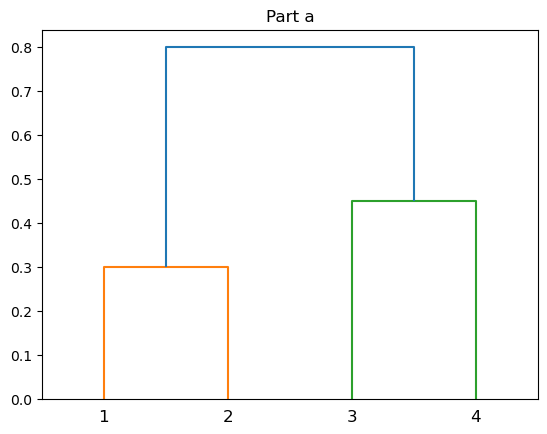

In [41]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt


mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45],[0.7, 0.8, 0.45, 0.0]])
dists = squareform(mat)
linkage_matrix = linkage(dists, "complete")
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Part a")
plt.show()

Heights at which fusion occurs 0.3,0.45,0.8 

b) 

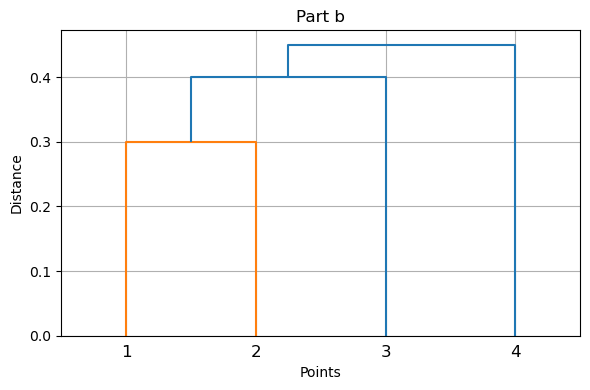

In [44]:

linkage_matrix = linkage(dists, method='single')


fig, ax = plt.subplots(figsize=(6, 4))
dendrogram(
    linkage_matrix,
    labels=["2", "1", "3", "4"],
    ax=ax
)


ax.invert_xaxis()


plt.title("Part b")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

c) 
The observations in the cluster are:

i)  {1, 2}     
ii) {3, 4}

d) 
The observations in the cluster are:

i)  {1, 2, 3}    
ii) {4}

e) 

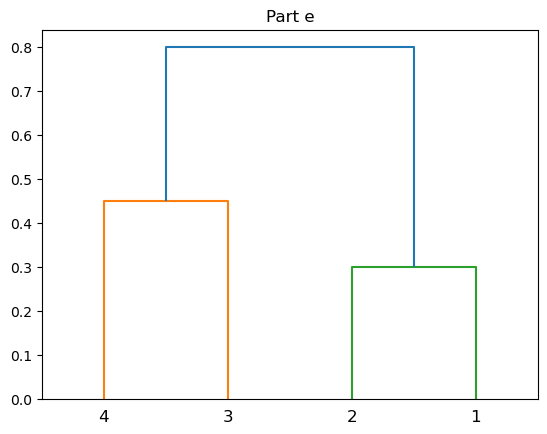

In [48]:
liiink = np.array([[2.  , 3.  , 0.45, 2.  ],
                   [0.  , 1.  , 0.3 , 2.  ],
                   [4.  , 5.  , 0.8 , 4.  ]])

dendrogram(liiink, labels=["2", "1", "4", "3"])
plt.title("Part e")
plt.show() 

##### References
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hammingLoss.html
https://numpy.org/doc/stable/reference/generated/numpy.unique.html
https://numpy.org/doc/stable/reference/generated/numpy.where.html
https://numpy.org/doc/stable/reference/generated/numpy.sum.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
https://pandas.pydata.org/pandasdocs/stable/reference/api/pandas.Series.value_counts.html
https://docs.python.org/3/library/collections.html#collections.Counter
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
https://docs.python.org/3/library/itertools.html#itertools.combinations
https://numpy.org/doc/stable/reference/generated/numpy.std.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html




